## 배달 서비스를 제공하는 스타트업 VberEats에서 고객 정보를 이용하여 마케팅 전략을 수립하려한다.

VberEats.csv

|컬럼|정의|type|
|:---|:---|:---:|
|ids|식별 번호|int64|
|ages|나이|int64|
|orders|주문 수|int64|
|purchases|결제 총 금액|float64|
|bookmarks|즐겨찾기 수|int64|
|replies|답글 수|int64|
|ratings|별점 수|int64|
|period|가입 기간|int64|  

정답 및 해설 : https://tjd229.tistory.com/25

In [30]:
import numpy as np
import pandas as pd

df = pd.read_csv('../content/tjd229/VberEats.csv')
df.shape

(18951, 8)

In [31]:
df.columns

Index(['ids', 'ages', 'orders', 'purchases', 'bookmarks', 'replies', 'ratings',
       'period'],
      dtype='object')

### 분석을 수행하기 전, 아래의 전처리를 수행하시오.

단계 1 : 결제 총 금액(purchases)에 결측값(Null)이 포함된 데이터를 Test Set으로, 그 외 데이터는 Train Set으로 분할한다.  
- Test Set의 데이터 수는 203개이다.  

단계 2 : 식별 번호(ids)와 결제 총 금액(purchases) 컬럼을 제외한 모든 컬럼에 대해 Train Set을 기준으로 MinMax 표준화(Standardization) 한다.  

단계 3 : Train Set으로 DecisionTreeRegressor 모델을 학습하고, Test Set에 적용하여 VberEats 데이터의 결측값을 모델의 예측값으로 대체한다.  
- 독립 변수(총 6개, 모델 적용시 반드시 컬럼 순서를 지킬 것) : ages, orders, bookmarks, replies, ratings, period  
- 결측값을 채운 후, purchases 컬럼의 평균값은 2666251.4393435703이다.

상기 전처리를 완료한 데이터셋(데이터셋명: <span style="color:skyblue">customer</span>)을 이용하여 다음 1~3번 문제에 답하시오.

In [32]:
Test = df.loc[df.purchases.isnull(),].copy()
Train = df.loc[df.purchases.notnull(),].copy()
Test.shape, Train.shape

((203, 8), (18748, 8))

In [33]:
X_train = Train[[ 'ages', 'orders', 'bookmarks', 'replies', 'ratings', 'period']]
X_test = Test[[ 'ages', 'orders', 'bookmarks', 'replies', 'ratings', 'period']]
y_train = Train['purchases']
y_test = Test['purchases']

In [34]:
Test.head()

,ids,ages,orders,purchases,bookmarks,replies,ratings,period
111,17967,20,10,NaN,5,29,113,10
323,68198,44,2,NaN,7,12,12,36
470,2336,30,1,NaN,9,26,96,2
550,55012,33,54,NaN,8,25,99,30
809,16217,25,51,NaN,11,9,12,9


👉 MinMaxScaler

In [35]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.preprocessing import MinMaxScaler  

my_MMS = MinMaxScaler()
X_train = my_MMS.fit_transform(X_train)

# X_train 의 Max, Min 을 사용해서 X_test 을 MinMaxScaler ( X_train 의 Max, Min을 사용)
# X 전체의 Max, Min 을 사용하것 (X 전체 MinMaxScaler) 과 다름.  ( X 의 Max, Min을 사용)
# X_test의 Max, Min을 사용하것 과도 다름  ( X_test 의 Max, Min을 사용)

X_test = my_MMS.transform(X_test)      
#my_MMS.fit_transform(X_test) 은 X_test 로 fit 한다.


👉 DecisionTreeRegressor

In [36]:

my_DTR = DecisionTreeRegressor(random_state=229)
my_DTR.fit(X_train, y_train)
df.loc[df.purchases.isnull(),'purchases'] = my_DTR.predict(X_test)


In [37]:
df.head()

,ids,ages,orders,purchases,bookmarks,replies,ratings,period
0,47009,42,95,3509917.0,9,14,26,26
1,74838,41,10,673392.0,10,24,72,40
2,34976,20,23,1943940.0,6,20,51,19
3,34959,37,46,1981730.0,0,26,52,19
4,36710,36,93,386907.0,10,30,59,20


In [38]:
customer = df.copy()

#### 필요 라이브러리 함수,클래스 및 설정값 목록  


from sklearn.tree import DecisionTreeRegressor  
from sklearn.preprocessing import MinMaxScaler  
random_state=229  
문제 지시 외 Default 값 사용  

### Q1. (<span style="color:skyblue">customer</span>를 이용하여)마케팅 전략을 수립하기 위해 군집화하려 한다. 다음 단계에 따라 분석을 수행하고 질문에 답하시오.


단계 1 : 데이터의 25%를 샘플링한다.  
단계 2 : 고객 데이터의 ages 컬럼을 이용하여 아래 규칙에 따라 age_cls 컬럼을 새로 생성한다.
- ages가 10이상 19이하인 경우 age_cls는 10s가 된다.  
- ages가 20이상 29이하인 경우 age_cls는 20s가 된다.  
- ages가 30이상 39이하인 경우 age_cls는 30s가 된다.  
- ages가 40이상 49이하인 경우 age_cls는 40s가 된다.  
- ages가 50이상인 경우 age_cls는 50s가 된다. 

단계 3 : 나이(ages), 주문 수(orders), 즐겨찾기 수(bookmarks), 답글 수(replies), 별점 수(ratings), 가입 기간(period) 컬럼을 MinMax 표준화(Standardization) 한다.       
단계 4 : 독립 변수들에 대해 K-means 군집 분석을 수행한다. 이 때, 군집 수는 2~5개 중 K-means Silhouette 를 통해 구하고, 이 중 첫 번째로 높은 score를 최적의 K로 설정한다.  
- 독립 변수(총 6개) : 나이(ages), 주문 수(orders), 즐겨찾기 수(bookmarks), 답글 수(replies), 별점 수(ratings), 가입 기간(period)  
            
단계 5 : 최적의 K로 K-means 군집 분석 수행 후, age_cls별 가장 큰 군집 비율을 구한다. 그 중에서 최대값을 구하시오  

※ 정답은 반올림하여 소수점 둘째 자리까지 출력하시오.
(정답 예시: 2.29)

sample(frac)

In [39]:
df1 = customer.sample(frac=0.25, random_state=229)
df1.shape

(4738, 8)

In [40]:
df1['age_cls'] = 0

👉 pd.cut  
추가 column = pd.cut(대상 column,
                    bins,
                    lables)

In [41]:
df1['age_cls'] = pd.cut(df1.ages,
                        bins = [9,19,29,39,49,100],
                        labels= ['10s','20s','30s','40s','50s']
)

In [42]:
df1.head()

,ids,ages,orders,purchases,bookmarks,replies,ratings,period,age_cls
6424,6941,33,57,204381.0,5,8,21,4,30s
14181,43255,40,5,34325.0,6,25,75,24,40s
8550,37222,31,88,6708403.0,3,18,67,20,30s
3876,13537,43,32,1975157.0,0,11,15,8,40s
12120,69188,34,64,11142283.0,9,11,32,38,30s


In [43]:
X_train = df1[['ages', 'orders', 'bookmarks', 'replies', 'ratings', 'period']]

MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 

my_MMS = MinMaxScaler()
X_train = my_MMS.fit_transform(X_train)
X_train

array([[0.41666667, 0.57142857, 0.41666667, 0.20512821, 0.10096154,
        0.07692308],
       [0.61111111, 0.04081633, 0.5       , 0.64102564, 0.36057692,
        0.58974359],
       [0.36111111, 0.8877551 , 0.25      , 0.46153846, 0.32211538,
        0.48717949],
       ...,
       [0.16666667, 0.6122449 , 0.16666667, 0.64102564, 0.34134615,
        0.94871795],
       [0.69444444, 0.80612245, 0.08333333, 0.53846154, 0.18269231,
        0.51282051],
       [0.30555556, 0.2755102 , 0.91666667, 0.74358974, 0.4375    ,
        0.20512821]])

silhouette_score

In [45]:
K = range(2,6)
sil_list = []

for k in K:
    my_sil = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=229)
    my_sil.fit(X_train)
    sil_list.append(silhouette_score(X_train,my_sil.labels_))

In [46]:
sil_df = pd.DataFrame({ "K" : K,
                       "sil_score" : sil_list})
sil_df

,K,sil_score
0,2,0.161806
1,3,0.149679
2,4,0.150796
3,5,0.149264


In [47]:
sil_df.sort_values(by='sil_score', ascending=False).iat[0,0]    # sil_score 의 내림차순 값 에서 첫번째 (가장큰) 값 의 첫번째 col(K) 값

# sil_df.sort_values(by='sil_score', ascending=False).iloc[0,0] 도 같다
# sil_df.sort_values(by='sil_score', ascending=False).loc[0,'K']  <-- 이것 쓰면 안된다.. 0번인 K 찾는것이 아니라 , 0번째 을 찾는거다.

2

In [48]:
sil_df.sort_values(by='sil_score', ascending=False).iat[0,1]     # 내림차순 두번째 col (sil_score) 값 에서 첫번째 (가장큰) 값

# sil_df.sort_values(by='sil_score', ascending=False).loc[0,'sil_score']   <--  0번을 찾는게 아니다. (소팅되면서 0번이 3번째로 될 수도 있다.)

0.16180577526375925

KMeans

In [49]:
my_KMN = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=229)
my_KMN.fit(X_train)
df1['cluster'] = my_KMN.labels_


In [62]:
# 나이별, 각 군집 비율

df1.groupby('age_cls')['cluster'].value_counts(normalize=True)#.max().round(2)

age_cls  cluster
10s      1          0.520270
         0          0.479730
20s      0          0.526383
         1          0.473617
30s      0          0.501606
         1          0.498394
40s      0          0.510880
         1          0.489120
50s      1          0.517647
         0          0.482353
Name: cluster, dtype: float64

In [75]:
# 10s 군집 1 이 전체에서 데이터에서 차지하는 비율

df1.loc[df1.age_cls == '10s','cluster'].value_counts() / df1.shape[0]


1    0.032503
0    0.029970
Name: cluster, dtype: float64

rank()

In [80]:
df1.groupby('age_cls')['cluster'].value_counts().sort_values(ascending=False).rank(ascending=False)

age_cls  cluster
20s      0           1.0
30s      0           2.0
         1           3.0
20s      1           4.0
40s      0           5.0
         1           6.0
10s      1           7.0
         0           8.0
50s      1           9.0
         0          10.0
Name: cluster, dtype: float64

👉 groupby.name / reset_index()

'cluster' 이름이 중복된다. value_count 한 column 의 이름을 다시 정해줘야 한다.  

rename_axis : 기존 column을 다시 정의 하거나,   
Series.name : series name 을 다시 정의 

In [82]:
df1.groupby(['age_cls','cluster']).size()

age_cls  cluster
10s      0          142
         1          154
20s      0          828
         1          745
30s      0          781
         1          776
40s      0          540
         1          517
50s      0          123
         1          132
dtype: int64

In [193]:
xxx = df1.groupby('age_cls')['cluster'].value_counts().sort_values(ascending=False)
xxx.name = 'count_cluster'
xxx.reset_index()


,age_cls,cluster,count_cluster
0,20s,0,828
1,30s,0,781
2,30s,1,776
3,20s,1,745
4,40s,0,540
5,40s,1,517
6,10s,1,154
7,10s,0,142
8,50s,1,132
9,50s,0,123


In [52]:
df_group = df1.groupby('age_cls')['cluster'].value_counts().sort_values(ascending=False).rename_axis(['age_cls','clusters']).reset_index()

df_group

,age_cls,clusters,cluster
0,20s,0,828
1,30s,0,781
2,30s,1,776
3,20s,1,745
4,40s,0,540
5,40s,1,517
6,10s,1,154
7,10s,0,142
8,50s,1,132
9,50s,0,123


In [66]:
# 두번째로 많은 군집을 갖은 age_cls 와 그 군집은 무엇인가?
df1.groupby('age_cls')['cluster'].value_counts().sort_values(ascending=False)#.index[1]

age_cls  cluster
20s      0          828
30s      0          781
         1          776
20s      1          745
40s      0          540
         1          517
10s      1          154
         0          142
50s      1          132
         0          123
Name: cluster, dtype: int64

In [70]:
df1.groupby('age_cls')['cluster'].value_counts(ascending=True)   # 그룹 내에서의 정렬

age_cls  cluster
10s      0          142
         1          154
20s      1          745
         0          828
30s      1          776
         0          781
40s      1          517
         0          540
50s      0          123
         1          132
Name: cluster, dtype: int64

In [105]:
# 그리고 그 값은 (군집수)
df1.groupby('age_cls')['cluster'].value_counts().sort_values(ascending=False).iat[1]

781

#### 필요 라이브러리 함수,클래스 및 설정값 목록  


from sklearn.preprocessing import MinMaxScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  
random_state=229  
문제 지시 외 Default 값 사용  

### Q2. (<span style="color:skyblue">customer</span>를 이용하여)주문 수(orders), 즐겨찾기 수(bookmarks), 답글 수(replies), 별점 수(ratings), 가입 기간(period) 5개 독립 변수에 대하여 다중공선성(variance inflation factor)를 구하고 그 중 값이 가장 큰 변수 명의 컬럼 명을 구하시오.


※ 다중공선성 계산시, 절편은 제외한다.
정답 예시: ids

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df2 = customer.copy()

vif_col = df2[['orders','bookmarks','replies','ratings','period']]

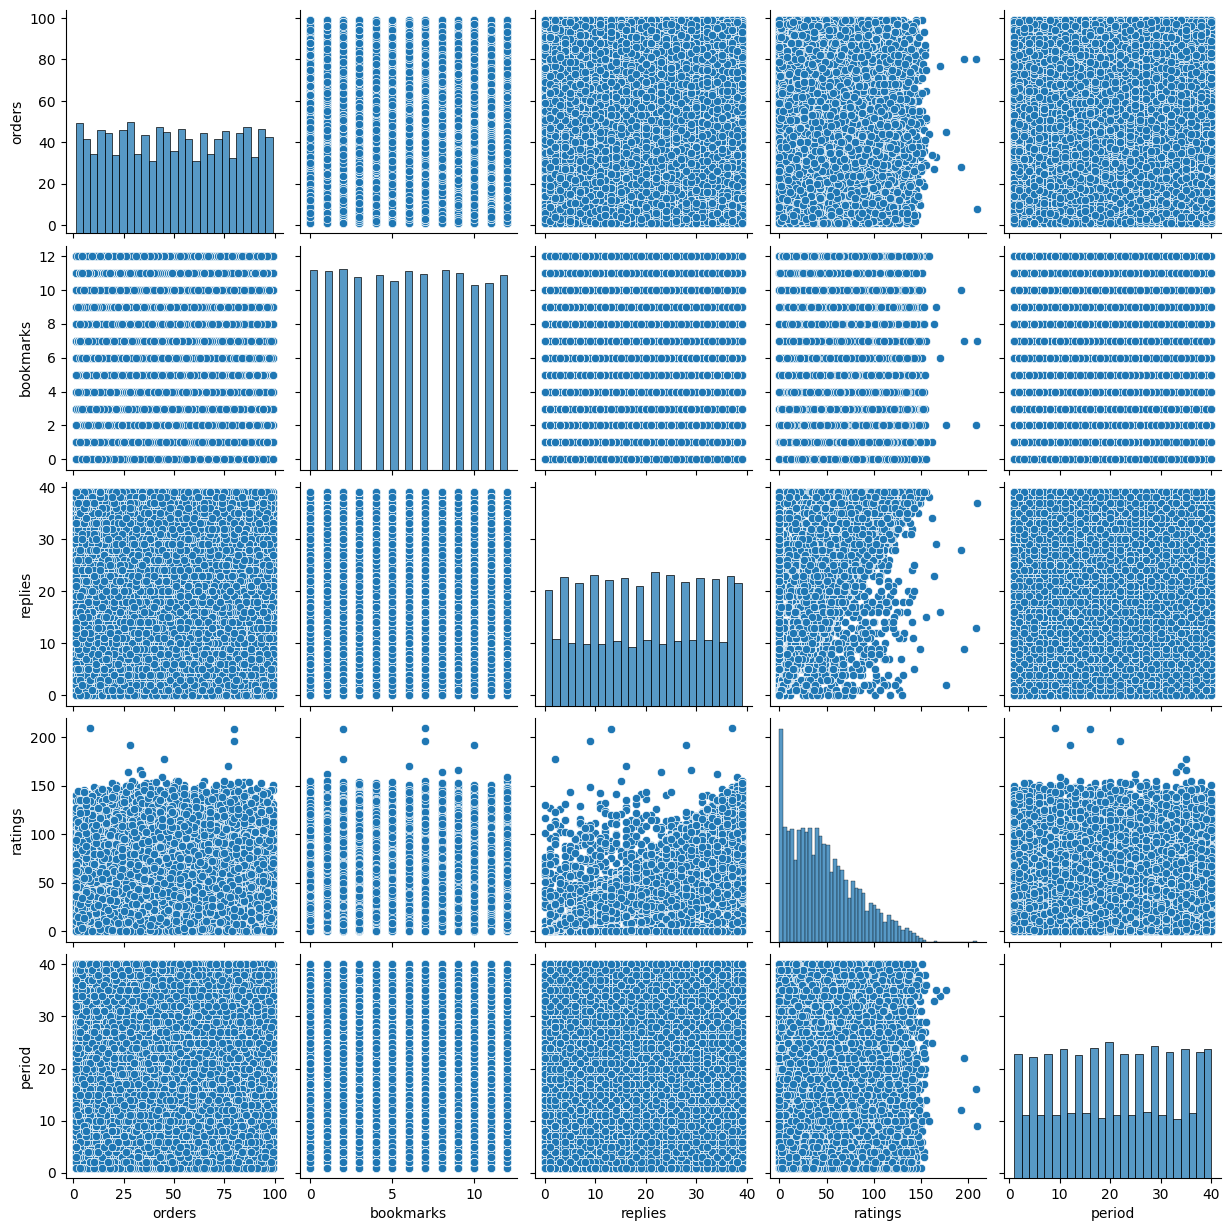

In [202]:
import seaborn as sns

sns.pairplot(vif_col)

#### 필요 라이브러리 함수,클래스 및 설정값 목록  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [237]:
count_col = vif_col.shape[1]
count_col

# column 갯수

5

In [229]:
# 각 column 의 순번 (몇번째)  -> orders 는 몇번째 컬럼인가?
vif_col.columns.values

array(['orders', 'bookmarks', 'replies', 'ratings', 'period'],
      dtype=object)

👉 VIF
```
vif_list = [[]]

for i in 대상df.shape[1]
    vif_list.append(variance_inflation_factor(대상df,i))

result = pd.DataFrame({
    'columns' : 대상df.columns,
    'factors' : vif_list
})
```

In [230]:
vif_list =[]

for i in count_col:                             # for column 갯수 만큼
    vif_list.append(variance_inflation_factor(vif_col,i))     # X (독립변수) df 에 첫번째 column (독립변수) 부터 각각 마지막 column (독립변수까지) 까지

# vif_list = [variance_inflation_factor(vif_col,i) for i in count_col]

In [216]:
vif_df = pd.DataFrame()
vif_df['cols'] = vif_col.columns
vif_df['factor'] = vif_list
vif_df

,cols,factor
0,orders,3.096206
1,bookmarks,2.818769
2,replies,7.534163
3,ratings,5.933221
4,period,3.143517


In [233]:
vif_df.sort_values(by='factor',ascending=False).iat[0,0]

'replies'

### Q3 (<span style="color:skyblue">customer</span>를 이용하여)마케팅 전략을 수립하기 위해 군집화하려 한다. 다음 단계에 따라 분석을 수행하고 질문에 답하시오.


단계 1 : 주문 수(orders) 컬럼을 이용하여 아래 규칙에 따라 regular 컬럼을 새로 생성한다.    
- orders가 평균보다 큰 경우 1이 되고, 그 외에는 0이 된다.

단계 2 : Train Set과 Test Set을 2:8 비율로 나눈다.     
단계 3 : Train Set으로 나이브 베이즈 분류 모델을 학습한다.  
- 독립 변수(총 6개) : 나이(ages), 결제 총 금액(purchases), 즐겨찾기 수(bookmarks), 답글 수(replies), 별점 수(ratings), 가입 기간(period)  
- 종속 변수 : regular
            
단계 4 : 단계 3에서 학습한 모델을 Test Set에 적용한다. 모델의 예측 확률값이 threshold보다 큰 경우를 positive로 정의한다. threshold는 0.4, 0.5, 0.6 세 경우에 대하여 recall_score를 계산하고 그 중 최대값을 구하시오
- 분류된 라벨 1이 positive이다.

※ 정답은 반올림하여 소수점 첫째 자리까지 출력하시오.
(정답 예시: 22.9)

In [235]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import recall_score 

df3 = customer.copy()

👉 np.where(조건,True,False)

In [238]:
df3['regular'] = np.where(df3.orders >df3.orders.mean(),1,0)
df3.head()

,ids,ages,orders,purchases,bookmarks,replies,ratings,period,regular
0,47009,42,95,3509917.0,9,14,26,26,1
1,74838,41,10,673392.0,10,24,72,40,0
2,34976,20,23,1943940.0,6,20,51,19,0
3,34959,37,46,1981730.0,0,26,52,19,0
4,36710,36,93,386907.0,10,30,59,20,1


In [239]:
X = df3[['ages', 'purchases', 'bookmarks', 'replies', 'ratings', 'period']]
y = df3['regular']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=229)

👉 predic_proba

In [252]:
my_NBR = GaussianNB()
my_NBR.fit(X_train, y_train)
y_pred = my_NBR.predict(X_test)
y_proba = my_NBR.predict_proba(X_test)

In [255]:
y_proba[:,1]

array([0.2250014 , 0.23397979, 0.99922363, ..., 0.2860825 , 0.29900197,
       0.21781161])

In [280]:
result_df = pd.DataFrame()
result_df['y_pred'] = y_pred
result_df['y_proba'] = y_proba[:,1]
result_df['>0.4'] = np.where(y_proba[:,1]>=0.4,1,0)
result_df['>0.5'] = np.where(y_proba[:,1]>=0.5,1,0)
result_df['>0.6'] = np.where(y_proba[:,1]>=0.6,1,0)

result_df

,y_pred,y_proba,>0.4,>0.5,>0.6
0,0,0.225001,0,0,0
1,0,0.233980,0,0,0
2,1,0.999224,1,1,1
3,0,0.275774,0,0,0
4,1,1.000000,1,1,1
...,...,...,...,...,...
15156,0,0.331368,0,0,0
15157,0,0.220080,0,0,0
15158,0,0.286082,0,0,0
15159,0,0.299002,0,0,0


In [266]:
recall_score(y_test, result_df['>0.4'])

0.6337730870712401

In [267]:
recall_score(y_test,result_df['>0.5'])

0.5802110817941952

In [268]:
recall_score(y_test,result_df['>0.6'])

0.5410290237467018

#### 필요 라이브러리 함수,클래스 및 설정값 목록  


from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import recall_score  
random_state=229  
문제 지시 외 Default 값 사용  

In [288]:
thres = ['>0.4','>0.5','>0.6']
score_list = []

for i in thres :
    score_list.append(recall_score(y_test,result_df[i]))


score_df = pd.DataFrame()
score_df['threshold'] = thres
score_df['recall_score'] = score_list

score_df





,threshold,recall_score
0,>0.4,0.633773
1,>0.5,0.580211
2,>0.6,0.541029
